In [53]:
# Importing Libraries
import numpy as np
import random
import matplotlib.pyplot as plt

In [54]:
# Calculating the loss function
def mean_squared_error(y_true, y_predicted): 
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

In [63]:
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.001,
                     stopping_threshold = 1e-5):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    for i in range(iterations):
         
        y_predicted = (current_weight * x) + current_bias
        current_cost = mean_squared_error(y, y_predicted)
 
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients and update
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        print(f"Iteration {i+1}: Cost {current_cost}, Weight {current_weight}, Bias {current_bias}")
     
    # For showing the reduction of cost from left to right
    weights = [weight*(-1) for weight in weights]
    
    # Visualizing
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias

Iteration 1: Cost 0.20243551270091525, Weight 0.09961788744981358, Bias 0.009443891402138051
Iteration 2: Cost 0.2019807786022125, Weight 0.09923645602027498, Bias 0.00888923051629089
Iteration 3: Cost 0.20152817008669033, Weight 0.09885570409652239, Bias 0.008336013849010558
Iteration 4: Cost 0.20107767695206735, Weight 0.09847563006757629, Bias 0.007784237915253842
Iteration 5: Cost 0.20062928904508465, Weight 0.0980962323263301, Bias 0.007233899238362053
Iteration 6: Cost 0.20018299626127087, Weight 0.09771750926954086, Bias 0.006684994350040863
Iteration 7: Cost 0.19973878854470734, Weight 0.09733945929781997, Bias 0.006137519790340176
Iteration 8: Cost 0.1992966558877948, Weight 0.09696208081562388, Bias 0.0055914721076340615
Iteration 9: Cost 0.19885658833102143, Weight 0.09658537223124489, Bias 0.005046847858600727
Iteration 10: Cost 0.19841857596273163, Weight 0.09620933195680187, Bias 0.004503643608202544
Iteration 11: Cost 0.19798260891889594, Weight 0.09583395840823108, Bias

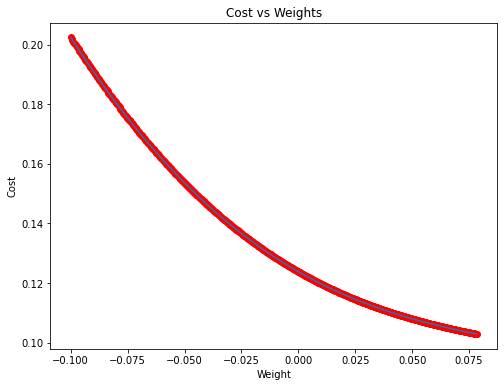

Estimated Weight: -0.07844460792502418
Estimated Bias: -0.16777657913572563


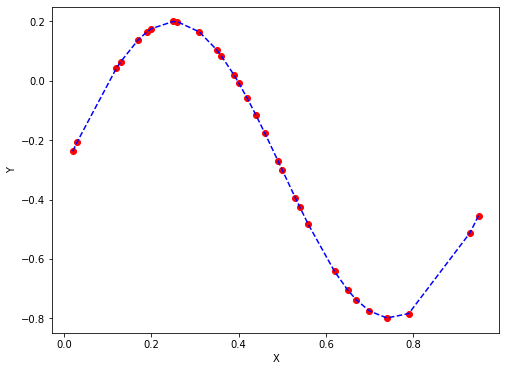

In [65]:
X = np.sort(np.array(random.sample(range(1, 100), 30)))
X = X/100
Y = -0.3+0.5*np.sin(X*np.pi*2)

estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=800)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

Y_pred = estimated_weight*X + estimated_bias

# Visualizing
plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
plt.plot(X, Y, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()